<a href="https://colab.research.google.com/github/abajr516/Quantum-Computing/blob/main/Deutsch_Jozsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=c5b6e8c6deedb7485387cf70606c1a81049028da6871b3ee746ef96de0c493c8
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
%matplotlib inline
import numpy as np
from pylatexenc import *

In [ ]:
# Define the Deutsch-Josza algorithm function
# Parameters: oracle (constant, balanced) and n (number of bits in str)
# Return quantum circuit
def deutsch_josza_algorithm(oracle, n):
  # Create a quantum circuit with n+1 qubits and n classical bits
  dj_circuit = QuantumCircuit(n+1, n)
  # Apply X gate to the last qubit
  dj_circuit.x(n)
  # Apply Hadamard gate to the last qubit
  dj_circuit.h(n)
  dj_circuit.barrier()
  # Apply Hadamard gates to all the bits
  dj_circuit.h(range(n))
  dj_circuit.barrier()
  # Apply the oracle
  dj_circuit.compose(oracle, range(n+1), inplace=True)
  dj_circuit.barrier()
  # Apply Hadamard  gates to all qubits AGAIN
  dj_circuit.h(range(n))
  dj_circuit.barrier()
  # Measure the first n bits
  dj_circuit.measure(range(n), range(n))
  return dj_circuit

# Define the balanced oracle function
def balanced_oracle(n):
    oracle = QuantumCircuit(n+1)
    for qubit in range(n):
        oracle.cx(qubit, n)
    return oracle

# Define the constant oracle function
def constant_oracle(n):
    oracle = QuantumCircuit(n+1)
    return oracle



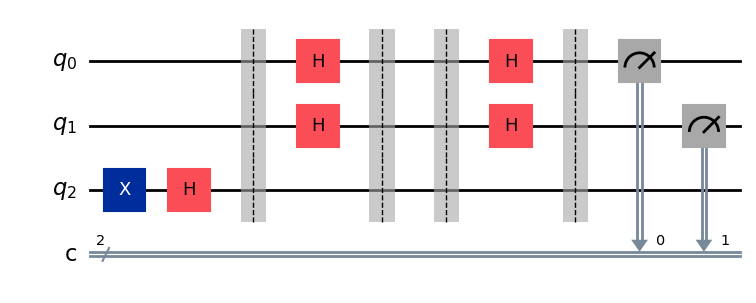

In [ ]:
# Run the algorithm with a CONSTANT oracle
n = 2
oracle = constant_oracle(n)
dj_circuit = deutsch_josza_algorithm(oracle, n)
dj_circuit.draw("mpl")

<ipython-input-87-303c2fe0ed11>:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(job).result()



Measurement Outcomes:


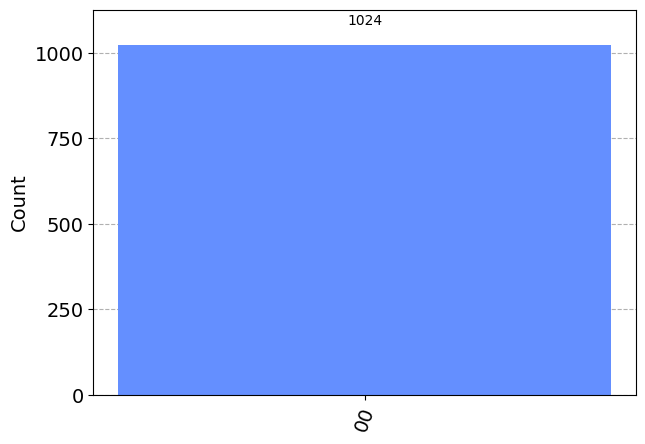

In [ ]:
# Simulate the circuit using the Aer simulator
simulator = Aer.get_backend('qasm_simulator')
job = assemble(transpile(dj_circuit, simulator), shots=1024)
result = simulator.run(job).result()

# Get the counts of the measurement outcomes
counts = result.get_counts()

# Plot the histogram of the measurement outcomes
print("\nMeasurement Outcomes:")
plot_histogram(counts)

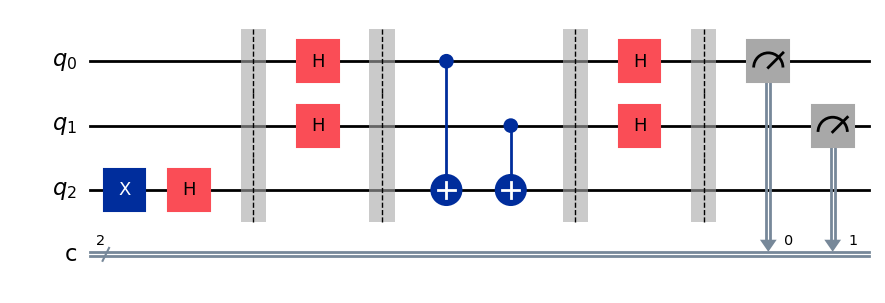

In [ ]:
# Run the algorithm with a BALANCED oracle
n = 2
oracle = balanced_oracle(n)
dj_circuit = deutsch_josza_algorithm(oracle, n)
dj_circuit.draw("mpl")


Measurement Outcomes:


<ipython-input-89-303c2fe0ed11>:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(job).result()


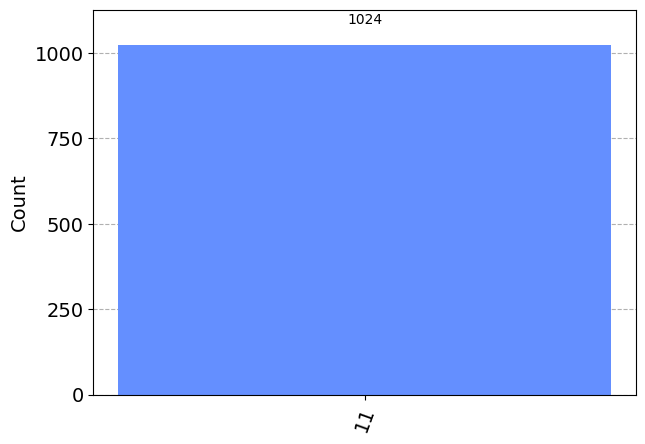

In [ ]:
# Simulate the circuit using the Aer simulator
simulator = Aer.get_backend('qasm_simulator')
job = assemble(transpile(dj_circuit, simulator), shots=1024)
result = simulator.run(job).result()

# Get the counts of the measurement outcomes
counts = result.get_counts()

# Plot the histogram of the measurement outcomes
print("\nMeasurement Outcomes:")
plot_histogram(counts)